In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

In [3]:
url = "https://upload.wikimedia.org/wikipedia/commons/1/1d/Fotograf_mit_Teleobjektiv.jpg"
resp = urllib.request.urlopen(url)
img_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)

In [4]:
kernel = np.array([
    [1, 1, 1],
    [1, 2, 1],
    [1, 1, 1]
], dtype=np.float32)
kernel /= kernel.sum()  # Normalize the kernel

In [5]:
def manual_filter(image, kernel):
    h, w = image.shape
    result = np.zeros_like(image)
    image = np.pad(image, 1)

    for i in range(h):
        for j in range(w):
            region = image[i:i+3, j:j+3]
            result[i, j] = np.sum(region * kernel)

    return result

manual_result = manual_filter(img, kernel)

In [6]:
opencv_result = cv2.filter2D(img, -1, kernel)


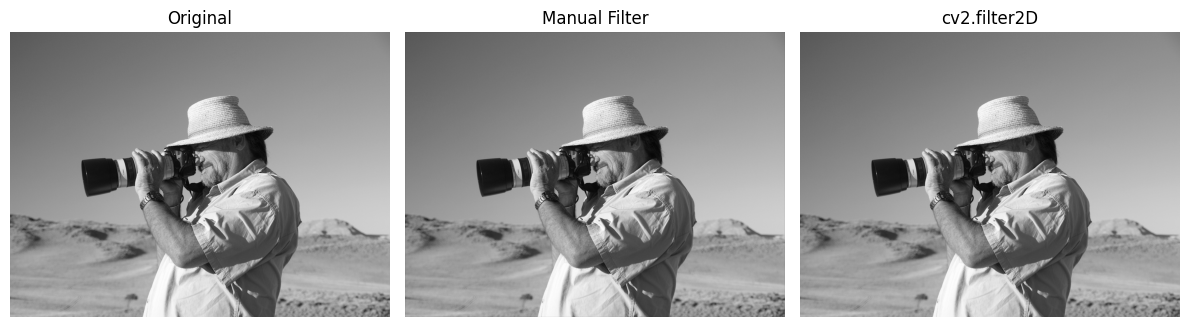

In [7]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(manual_result, cmap='gray')
plt.title("Manual Filter")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(opencv_result, cmap='gray')
plt.title("cv2.filter2D")
plt.axis('off')

plt.tight_layout()
plt.show()